# Inflation Forecasting

The following GitHub repository was used as a starting point: https://github.com/o-meneses-covarrubias/inflation_forecasting. Its methodology comes from the following article by Medeiros, Vasconcelos, Veiga, and Zilberman where RF was found to outperform other models for inflation forecasting: [Forecasting Inflation in a Data-Rich Environment: The Benefits of Machine Learning Methods](https://www.tandfonline.com/doi/epdf/10.1080/07350015.2019.1637745?needAccess=true)

A Random Forest (RF) model is used as a benchmark to compare inflation forecasting models.

In [41]:
import matplotlib.pyplot as plt

font = {"family": "Noto Serif", "size": 12}
plt.rc("font", **font)
plt.rc("axes", labelpad=8, titlepad=16, prop_cycle=plt.cycler("color", ['#004D7E', '#00A1E1', '#F18903']), grid=True)
plt.rc("grid",  linestyle=":", linewidth=1, color="#c1c1c1", alpha=1)


## Load Data

The data is focused on the UK economy. It is compiled from the following sources:

- CPIH annual rate, all items (CPIH): [ONS](https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23)
- Unemployment rate (Unemployment): [ONS](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/timeseries/s2pu/lms)
- Employment rate (Employment): [ONS](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/timeseries/s2pw/lms)
- GDP percentage change (GDP): [ONS](https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/ihyq/qna)
- Public Sector financial borrowing (JW2P, GVHE, ANSC): [ONS](https://www.ons.gov.uk/economy/governmentpublicsectorandtaxes/publicsectorfinance/datasets/publicsectorfinancesborrowingbysubsector)
- Money in circulation (Money): [BoE](https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxAZxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=1989&TD=31&TM=Dec&TY=2025&FNY=Y&CSVF=TT&html.x=66&html.y=26&SeriesCodes=LPMB8H4&UsingCodes=Y&Filter=N&title=LPMB8H4&VPD=Y)
- BoE's Bank rate (Bank_Rate): [BoE](https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp)
- Economic Optimism Index (EOI): [Ipsos](https://www.ipsos.com/en-uk/new-uk-opinion-polls/state-of-the-nation)

In [42]:
import pandas as pd

data = pd.read_csv("uk-data.csv")
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
data = data.set_index("Date")

### Test for Stationarity

In [43]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['CPIH'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.916944
p-value: 0.001914
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [44]:
result = adfuller(data['Unemployment'].diff(12).diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.981890
p-value: 0.000024
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


In [45]:
result = adfuller(data['Employment'].diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.434527
p-value: 0.132228
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [46]:
result = adfuller(data['GDP'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.161134
p-value: 0.000011
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [47]:
result = adfuller(data['Money'].diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.021686
p-value: 0.001301
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [48]:
result = adfuller(data['Bank_Rate'].diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.475195
p-value: 0.008647
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [49]:
result = adfuller(data['EOI'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.367020
p-value: 0.000339
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [50]:
result = adfuller(data['JW2P'].diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.789292
p-value: 0.000057
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


In [51]:
result = adfuller(data['GVHE'].diff(12).diff(12).diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.638808
p-value: 0.000109
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


In [52]:
result = adfuller(data['ANSC'].diff(12).diff(12).diff(12).dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.639318
p-value: 0.000109
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


### Extract Features

Introduce a 1-month lag to all columns, except `CPIH` as current values are used as the truth values. The lagged CPIH is stored in a new `CPIH_lag` column.

In [53]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)

lag = 1

data["CPIH_lag"] = data["CPIH"].shift(lag)
data["Unemployment"] = data["Unemployment"].shift(lag).diff(12).diff(12)
data["Employment"] = data["Employment"].shift(lag).diff(12)
data["GDP"] = data["GDP"].shift(lag)
data["Money"] = data["Money"].shift(lag).diff(12)
data["Bank_Rate"] = data["Bank_Rate"].shift(lag).diff(12)
data["EOI"] = data["EOI"].shift(lag)
data["JW2P"] = data["JW2P"].shift(lag).diff(12)
data["GVHE"] = data["GVHE"].shift(lag).diff(12).diff(12).diff(12)
data["ANSC"] = data["ANSC"].shift(lag).diff(12).diff(12).diff(12)
data = data.drop(index=data.index[0:lag])

data

,CPIH,Unemployment,Employment,GDP,Money,Bank_Rate,EOI,JW2P,GVHE,ANSC,CPIH_lag
Date,,,,,,,,,,,
1989-02-01,5.8,NaN,NaN,0.5,NaN,NaN,-14.0,NaN,NaN,NaN,5.7
1989-03-01,5.9,NaN,NaN,0.5,NaN,NaN,-18.0,NaN,NaN,NaN,5.8
1989-04-01,5.6,NaN,NaN,0.5,NaN,NaN,-14.0,NaN,NaN,NaN,5.9
1989-05-01,5.9,NaN,NaN,0.6,NaN,NaN,-28.0,NaN,NaN,NaN,5.6
1989-06-01,5.8,NaN,NaN,0.6,NaN,NaN,-21.0,NaN,NaN,NaN,5.9
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,7.9,1.3,0.1,0.0,-1143.0,3.50,NaN,5457.0,39.0,47.0,7.8
2023-06-01,7.3,1.3,0.2,0.0,-845.0,3.50,-30.0,2331.0,12.0,20.0,7.9
2023-07-01,6.4,1.6,0.3,0.0,-902.0,3.50,-37.0,-4544.0,-42.0,-29.0,7.3


### Determine Each Feature's Correlation to CPIH

In [54]:
correlation_matrix = data.corr()
print(correlation_matrix['CPIH'])

CPIH            1.000000
Unemployment   -0.066360
Employment      0.014132
GDP            -0.076965
Money          -0.323451
Bank_Rate       0.140255
EOI            -0.291722
JW2P            0.609376
GVHE            0.223776
ANSC            0.188486
CPIH_lag        0.990459
Name: CPIH, dtype: float64


In [55]:
import statsmodels.api as sm

analysis_data = data.dropna()
features = analysis_data.drop('CPIH', axis=1)
target = analysis_data['CPIH']

features = sm.add_constant(features)

model = sm.OLS(target, features)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   CPIH   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1053.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):          8.51e-191
Time:                        21:37:54   Log-Likelihood:                -19.872
No. Observations:                 249   AIC:                             61.74
Df Residuals:                     238   BIC:                             100.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0814      0.056     -1.450   

## Define Prediction Target and Split Into Training and Testing Data

`y` should only include the `CPIH` column as this shows inflation for the current month, and therefore serves as the truth value.

`x` should include all data, except `CPIH` and any other dropped features.


In [56]:
data = data.replace(np.nan, 0)

y = data["CPIH"]

unemployment = data["Unemployment"] # Store unemployment so it can be used by PC even if it is dropped from the dataset
# x = data.drop(columns=["CPIH"])
# x = data.drop(columns=["CPIH", "Unemployment", "Employment", "GDP"]) # RF and LASSO perform better without these features
x = data.drop(columns=["CPIH", "JW2P", "GVHE", "ANSC"]) # Most multivariate models perform better without these features

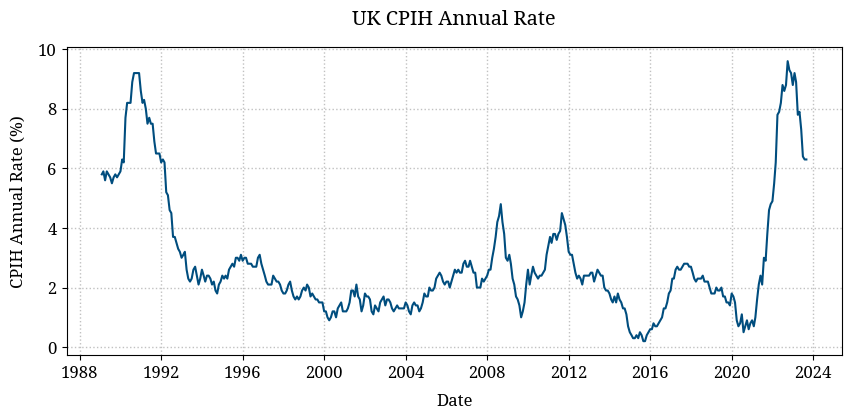

In [57]:
import os

f_cpih = plt.figure('cpih', figsize=(10, 4)) 
plt.title("UK CPIH Annual Rate")
plt.plot(y)
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")

# Add a figures directory if it doesn't exist
if not os.path.isdir('figures'):
    os.makedirs('figures')

plt.savefig("figures/uk-cpih.pdf", bbox_inches="tight")
plt.show()

Define training and testing datasets, and select a scaling method.

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer

# scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = RobustScaler()
# scaler = QuantileTransformer()
# scaler = PowerTransformer()

train_start = "1989-02-01"
train_end = "2020-08-01"

x_train = x.loc[train_start:train_end]
# x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
unemployment_train = unemployment.loc[train_start:train_end]
y_train = y.loc[train_start:train_end]

x_train = x_train.asfreq("MS")
y_train = y_train.asfreq("MS")

x_train

,Unemployment,Employment,GDP,Money,Bank_Rate,EOI,CPIH_lag
Date,,,,,,,
1989-02-01,0.0,0.0,0.5,0.0,0.00,-14.0,5.7
1989-03-01,0.0,0.0,0.5,0.0,0.00,-18.0,5.8
1989-04-01,0.0,0.0,0.5,0.0,0.00,-14.0,5.9
1989-05-01,0.0,0.0,0.6,0.0,0.00,-28.0,5.6
1989-06-01,0.0,0.0,0.6,0.0,0.00,-21.0,5.9
...,...,...,...,...,...,...,...
2020-04-01,0.7,-0.1,-2.7,499.0,0.00,-54.0,1.5
2020-05-01,0.7,-0.1,-20.3,358.0,-0.65,0.0,0.9
2020-06-01,0.3,-0.4,-20.3,72.0,-0.65,0.0,0.7


In [59]:
test_start = "2020-09-01"
test_end = "2023-09-01"

x_test = x.loc[test_start:test_end]
# x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)
unemployment_test = unemployment.loc[test_start:test_end]
y_test = y.loc[test_start:test_end]

## Benchmark Model (Random Forest)

### Train Random Forest (RF)

Create a RF model with hyperparameter tuning and fit it to the training data.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'max_features': [None, 'log2', 'sqrt'],
    'random_state': [42],
}

rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'log2', 'sqrt'],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

### Evaluate benchmark

Use the model to make predictions and evaluate its performance.


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_best_params = rf.best_params_
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

rf_mse = round(mean_squared_error(rf_pred_test, y_test), 4)
rf_mae = round(mean_absolute_error(rf_pred_test, y_test), 4)
err_dict = {}
err_dict["RF"] = [rf_mse, rf_mae]

print("Best parameters: ", rf_best_params)
print("Best score: ", round(rf.best_score_, 4))
print(f"Test MSE: ", rf_mse)

Best parameters:  {'max_depth': 10, 'max_features': None, 'n_estimators': 500, 'random_state': 42}
Best score:  -1.1415
Test MSE:  0.2897


Plot the predictions against the actual values


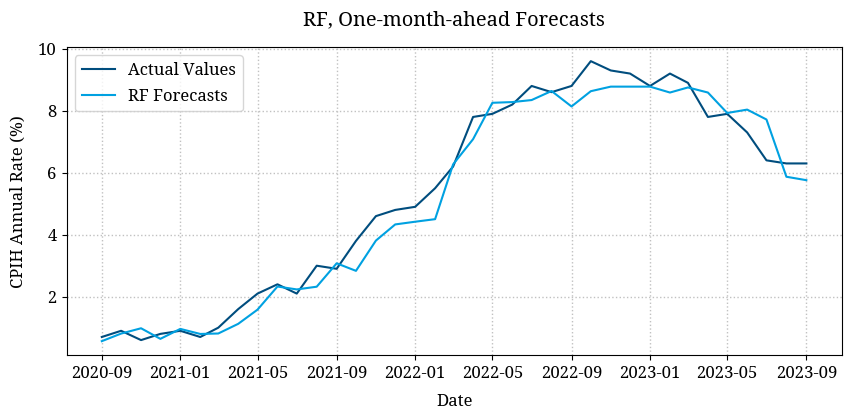

In [22]:
rf_pred_test_series = pd.Series(rf_pred_test, index=y_test.index)

f_rf = plt.figure('rf', figsize=(10, 4))
plt.title("RF, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/rf-pred.pdf", bbox_inches="tight")
plt.show()

## Model Comparison

### Naïve Models

#### 1-month Moving Average (1-MA)

Test MSE:  0.2962


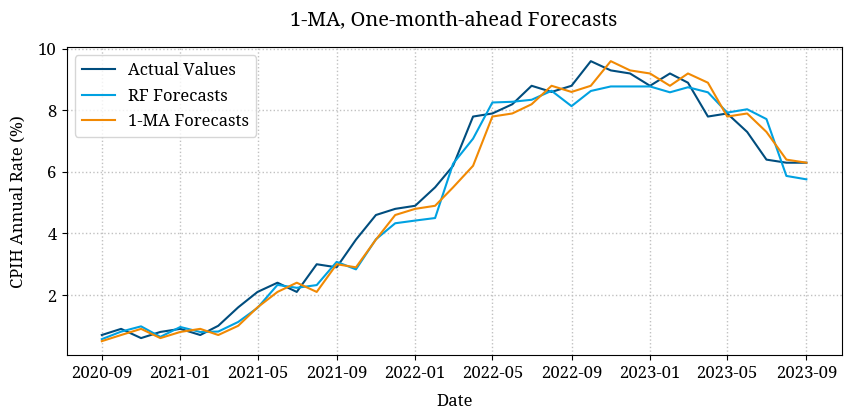

In [23]:
ma1_pred = x_test['CPIH_lag'].rolling(window=1).mean()

ma1_mse = round(mean_squared_error(ma1_pred, y_test), 4)
ma1_mae = round(mean_absolute_error(ma1_pred, y_test), 4)
err_dict["1-MA"] = [ma1_mse, ma1_mae]

print(f"Test MSE: ", ma1_mse)

f_ma1 = plt.figure('1-ma', figsize=(10, 4))
plt.title("1-MA, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(ma1_pred, label="1-MA Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/1-ma-pred.pdf", bbox_inches="tight")
plt.show()

#### 3-month Moving Average (3-MA)

Test MSE:  0.671


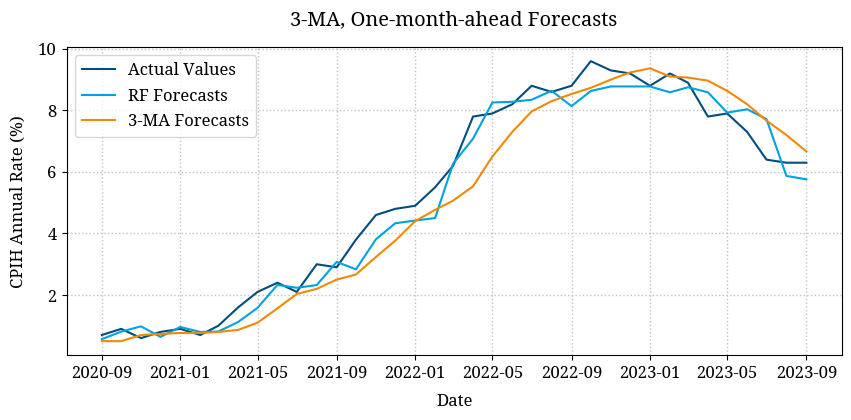

In [24]:
ma3_pred = x_test['CPIH_lag'].rolling(window=3).mean()
ma3_pred.fillna(x_test['CPIH_lag'].iloc[0], inplace=True)

ma3_mse = round(mean_squared_error(ma3_pred, y_test), 4)
ma3_mae = round(mean_absolute_error(ma3_pred, y_test), 4)
err_dict["3-MA"] = [ma3_mse, ma3_mae]

print(f"Test MSE: ", ma3_mse)

f_ma3 = plt.figure('3-ma', figsize=(10, 4))
plt.title("3-MA, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(ma3_pred, label="3-MA Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/3-ma-pred.pdf", bbox_inches="tight")
plt.show()

#### Random Walk, Atkeson and Ohanian variant (RW-AO)

Test MSE:  1.4009


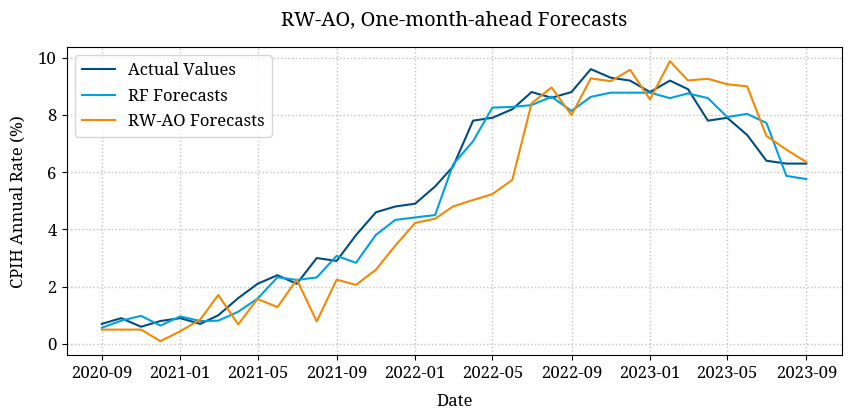

In [25]:
def generate_rw_forecast(last_four_values):
    avg_last_four = np.mean(last_four_values)

    # Generate the first four forecasts
    forecasts = []
    for i in range(4):
        random_error = np.random.uniform(-1, 1)
        forecast = avg_last_four + random_error
        forecasts.append(forecast)

    # Calculate the average of the first four forecasts
    avg_first_four_forecasts = np.mean(forecasts)

    # Adjust the forecasts so that their average is the same as the average of the last four values
    forecasts = [forecast + (avg_last_four - avg_first_four_forecasts) for forecast in forecasts]

    return forecasts[0]

rw_pred = x_test['CPIH_lag'].rolling(window=4).apply(generate_rw_forecast, raw=True)
rw_pred.fillna(x_test['CPIH_lag'].iloc[0], inplace=True)

rw_mse = round(mean_squared_error(rw_pred, y_test), 4)
rw_mae = round(mean_absolute_error(rw_pred, y_test), 4)
err_dict["RW-AO"] = [rw_mse, rw_mae]

print(f"Test MSE: ", rw_mse)

f_rw = plt.figure('rw', figsize=(10, 4))
plt.title("RW-AO, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(rw_pred, label="RW-AO Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/rw-pred.pdf", bbox_inches="tight")
plt.show()

### Univariate Models

#### Linear Regression (LR)

Best parameters:  {'fit_intercept': False}
Best score:  -0.0591
Test MSE:  0.3038


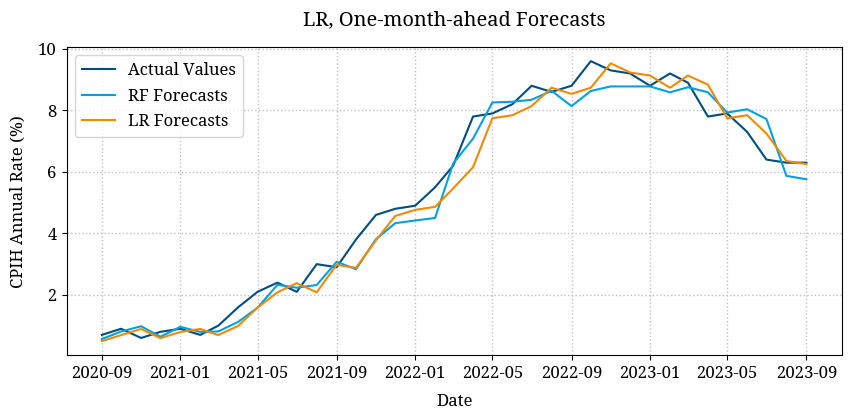

In [26]:
from sklearn.linear_model import LinearRegression

lr_param_grid = {
    'fit_intercept': [True, False],
}

lr = GridSearchCV(estimator=LinearRegression(), param_grid=lr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lr.fit(x_train['CPIH_lag'].values.reshape(-1, 1), y_train)
lr_best_params = lr.best_params_
lr_pred_test = lr.predict(x_test['CPIH_lag'].values.reshape(-1, 1))

lr_mse = round(mean_squared_error(lr_pred_test, y_test), 4)
lr_mae = round(mean_absolute_error(lr_pred_test, y_test), 4)
err_dict["LR"] = [lr_mse, lr_mae]

print("Best parameters: ", lr_best_params)
print("Best score: ", round(lr.best_score_, 4))
print(f"Test MSE: ", lr_mse)

lr_pred_test_series = pd.Series(lr_pred_test, index=y_test.index)

f_lr = plt.figure('lr', figsize=(10, 4)) 
plt.title("LR, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(lr_pred_test_series, label="LR Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/lr-pred.pdf", bbox_inches="tight")
plt.show()

#### Phillips Curve (PC)

Best parameters:  {'fit_intercept': True}
Best score:  -3.8857
Test MSE:  17.1711


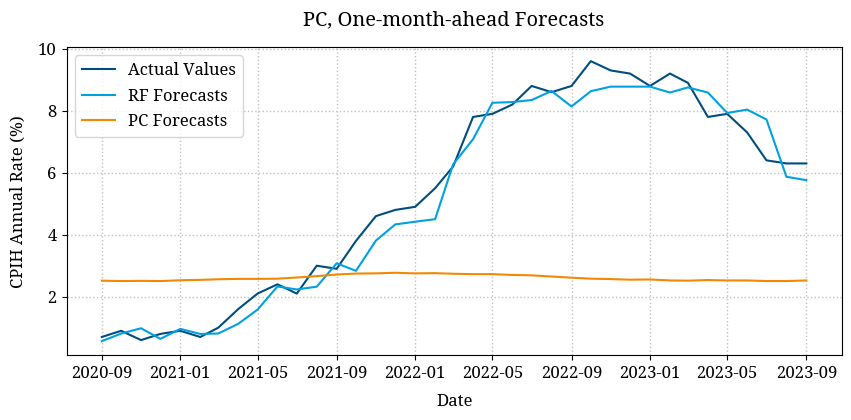

In [27]:
from sklearn.linear_model import LinearRegression

pc_param_grid = {
    'fit_intercept': [True, False],
}

pc = GridSearchCV(estimator=LinearRegression(), param_grid=pc_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
pc.fit(unemployment_train.values.reshape(-1, 1), y_train)
pc_best_params = pc.best_params_
pc_pred_test = pc.predict(unemployment_test.values.reshape(-1, 1))

pc_mse = round(mean_squared_error(pc_pred_test, y_test), 4)
pc_mae = round(mean_absolute_error(pc_pred_test, y_test), 4)
err_dict["PC"] = [pc_mse, pc_mae]

print("Best parameters: ", pc_best_params)
print("Best score: ", round(pc.best_score_, 4))
print(f"Test MSE: ", pc_mse)

pc_pred_test_series = pd.Series(pc_pred_test, index=y_test.index)

f_pc = plt.figure('pc', figsize=(10, 4)) 
plt.title("PC, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(pc_pred_test_series, label="PC Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/pc-pred.pdf", bbox_inches="tight")
plt.show()

#### Autoregressive Integrated Moving Average (ARIMA)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=0.035, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10.835, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=0.114, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1.853, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10.080, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1.898, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1.577, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3.727, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1.876, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=0.188, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5.180, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=0.833, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-0.994, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3.330, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3.353, Time=0.08 sec
 AR

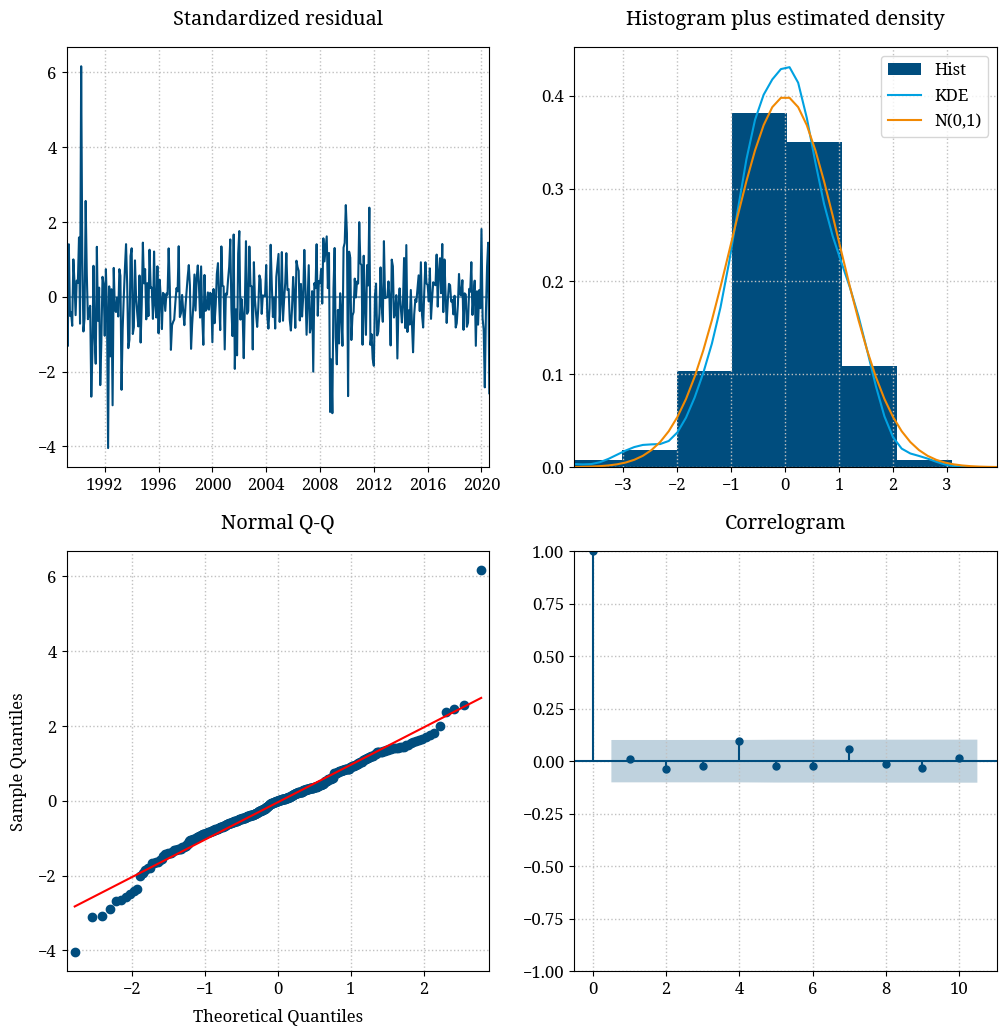

In [28]:
from pmdarima.arima import auto_arima

arima_stepwise_model = auto_arima(y_train, trace=True, random_state=42)
print(arima_stepwise_model.summary())

f_arima_diog = plt.figure('arima-diog', figsize=(12, 12))
arima_stepwise_model.plot_diagnostics(fig=f_arima_diog)
plt.savefig("figures/arima-diog.pdf", bbox_inches="tight")
plt.show()


Test MSE:  36.4835


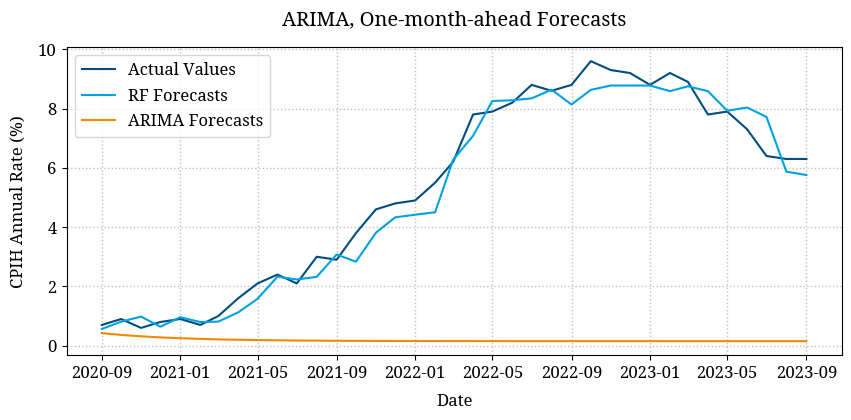

In [29]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(y_train, order=(arima_stepwise_model.order))
arima_model_fit = arima_model.fit()

arima_pred_test = arima_model_fit.forecast(steps=len(y_test))

arima_mse = round(mean_squared_error(arima_pred_test, y_test), 4)
arima_mae = round(mean_absolute_error(arima_pred_test, y_test), 4)
err_dict["ARIMA"] = [arima_mse, arima_mae]

print(f"Test MSE: ", arima_mse)

arima_pred_test_series = pd.Series(arima_pred_test, index=y_test.index)

f_arima = plt.figure('arima', figsize=(10, 4)) 
plt.title("ARIMA, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(arima_pred_test_series, label="ARIMA Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/arima-pred.pdf", bbox_inches="tight")
plt.show()


#### Seasonal Autoregressive Integrated Moving Average (SARIMA)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-65.886, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=10.835, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-23.070, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-45.166, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=10.080, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-55.897, Time=0.82 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-26.044, Time=0.82 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-66.827, Time=2.51 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-60.248, Time=2.31 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-67.633, Time=2.87 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-69.654, Time=2.27 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-69.635, Time=1.96 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-71.794, Time=2.22 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=-71.721, Time=1.72 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept 

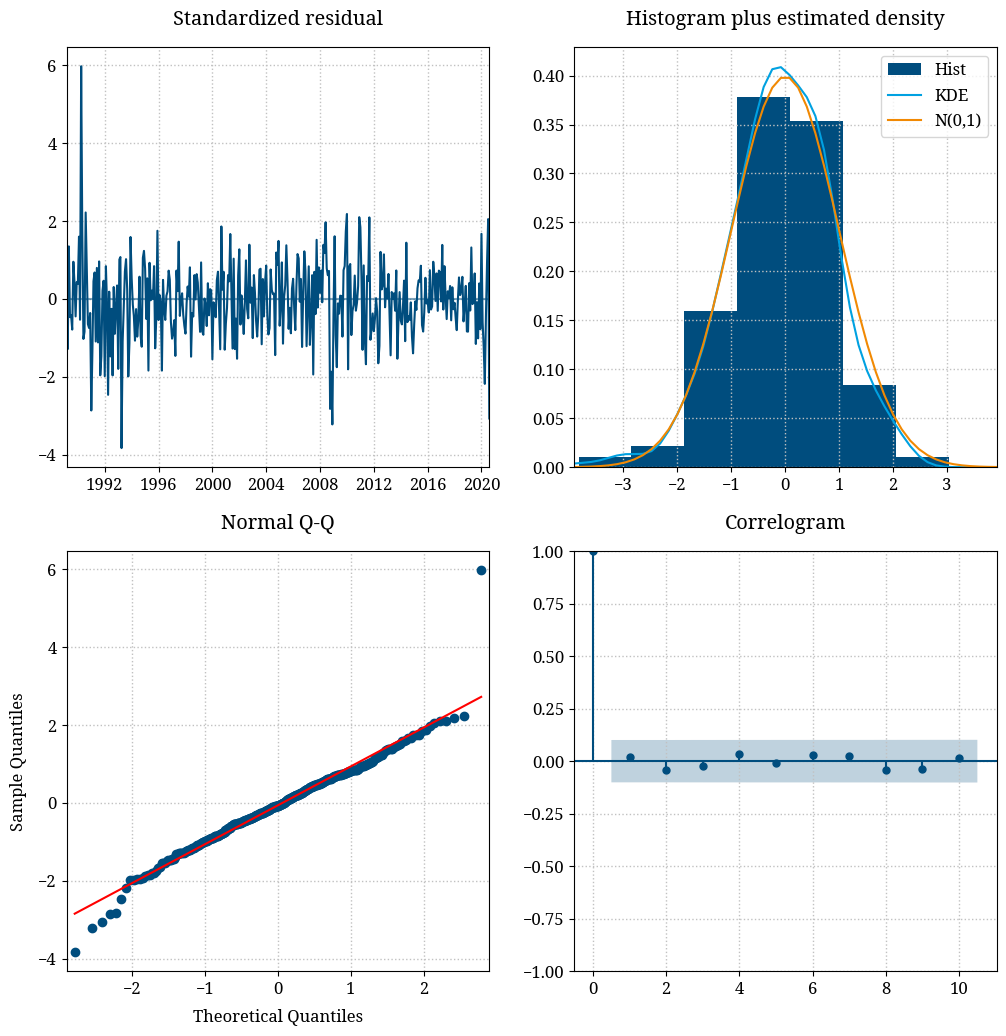

In [30]:
sarima_stepwise_model = auto_arima(y_train, trace=True, random_state=42, m=12)
print(sarima_stepwise_model.summary())

f_sarima_diog = plt.figure('sarima-diog', figsize=(12, 12))
sarima_stepwise_model.plot_diagnostics(fig=f_sarima_diog)
plt.savefig("figures/sarima-diog.pdf", bbox_inches="tight")
plt.show()

Test MSE:  30.9455


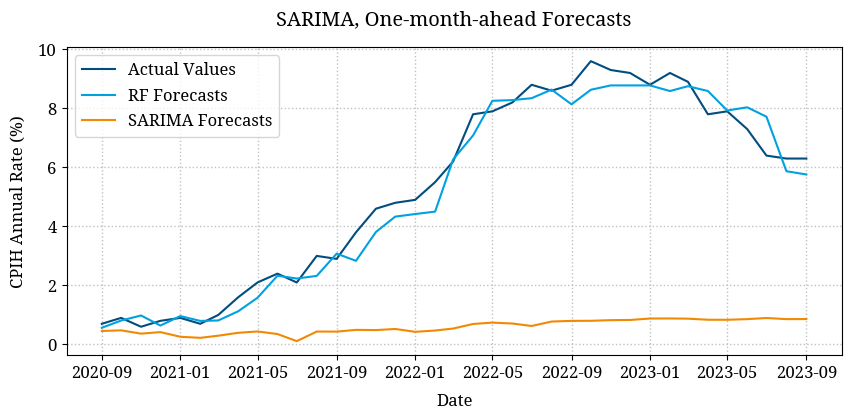

In [31]:
sarima_model = ARIMA(y_train, order=(sarima_stepwise_model.order), seasonal_order=(sarima_stepwise_model.seasonal_order))
sarima_model_fit = sarima_model.fit()

sarima_pred_test = sarima_model_fit.forecast(steps=len(y_test))

sarima_mse = round(mean_squared_error(sarima_pred_test, y_test), 4)
sarima_mae = round(mean_absolute_error(sarima_pred_test, y_test), 4)
err_dict["SARIMA"] = [sarima_mse, sarima_mae]

print(f"Test MSE: ", sarima_mse)

sarima_pred_test_series = pd.Series(sarima_pred_test, index=y_test.index)

f_sarima = plt.figure('sarima', figsize=(10, 4)) 
plt.title("SARIMA, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(sarima_pred_test_series, label="SARIMA Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/sarima-pred.pdf", bbox_inches="tight")


#### K Nearest Neighbour (KNN)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best score:  -0.918
Test MSE:  0.321


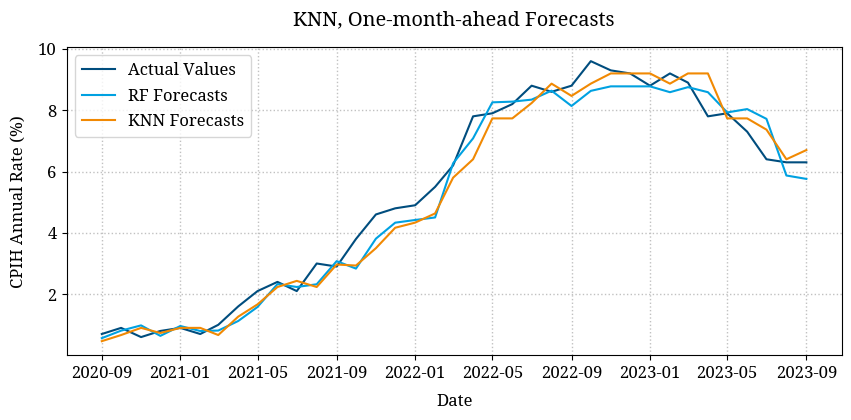

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=knn_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn.fit(x_train['CPIH_lag'].values.reshape(-1, 1), y_train)
knn_best_params = knn.best_params_
knn_pred_test = knn.predict(x_test['CPIH_lag'].values.reshape(-1, 1))

knn_mse = round(mean_squared_error(knn_pred_test, y_test), 4)
knn_mae = round(mean_absolute_error(knn_pred_test, y_test), 4)
err_dict["KNN"] = [knn_mse, knn_mae]

print("Best parameters: ", knn_best_params)
print("Best score: ", round(knn.best_score_, 4))
print(f"Test MSE: ", knn_mse)

knn_pred_test_series = pd.Series(knn_pred_test, index=y_test.index)

f_knn = plt.figure('knn', figsize=(10, 4))
plt.title("KNN, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(knn_pred_test_series, label="KNN Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/knn-pred.pdf", bbox_inches="tight")
plt.show()

### Multivariate Models

#### Multiple Linear Regression (MLR)

Best parameters:  {'fit_intercept': True}
Best score:  -0.0652
Test MSE:  0.2425


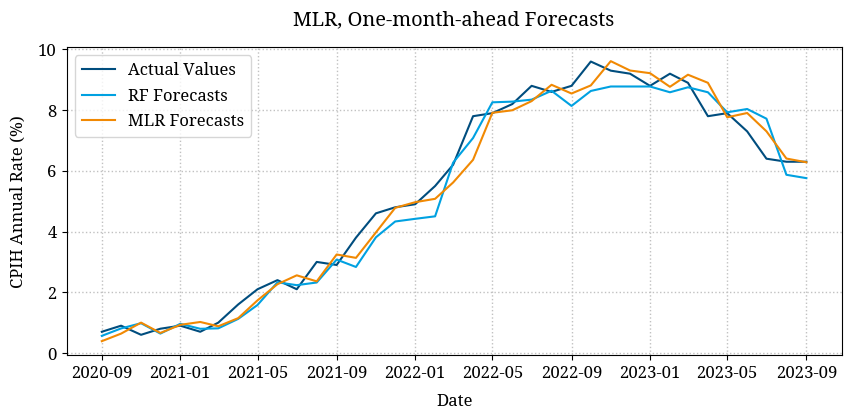

In [60]:
from sklearn.linear_model import LinearRegression

mlr_param_grid = {
    'fit_intercept': [True, False],
}

mlr = GridSearchCV(estimator=LinearRegression(), param_grid=mlr_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mlr.fit(x_train, y_train)
mlr_best_params = mlr.best_params_
mlr_pred_test = mlr.predict(x_test)

mlr_mse = round(mean_squared_error(mlr_pred_test, y_test), 4)
mlr_mae = round(mean_absolute_error(mlr_pred_test, y_test), 4)
err_dict["MLR"] = [mlr_mse, mlr_mae]

print("Best parameters: ", mlr_best_params)
print("Best score: ", round(mlr.best_score_, 4))
print(f"Test MSE: ", mlr_mse)

mlr_pred_test_series = pd.Series(mlr_pred_test, index=y_test.index)

f_mlr = plt.figure('mlr', figsize=(10, 4)) 
plt.title("MLR, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(mlr_pred_test_series, label="MLR Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/mlr-pred.pdf", bbox_inches="tight")
plt.show()

#### Autoregressive Integrated Moving Average with Explanatory Variable (ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-8.035, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9.703, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-13.873, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-13.558, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1860.729, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-12.007, Time=0.20 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-12.096, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-8.989, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-15.788, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-13.929, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-14.023, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-15.469, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-10.184, Time=0.20 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 2.911 seconds
                               SARIMA

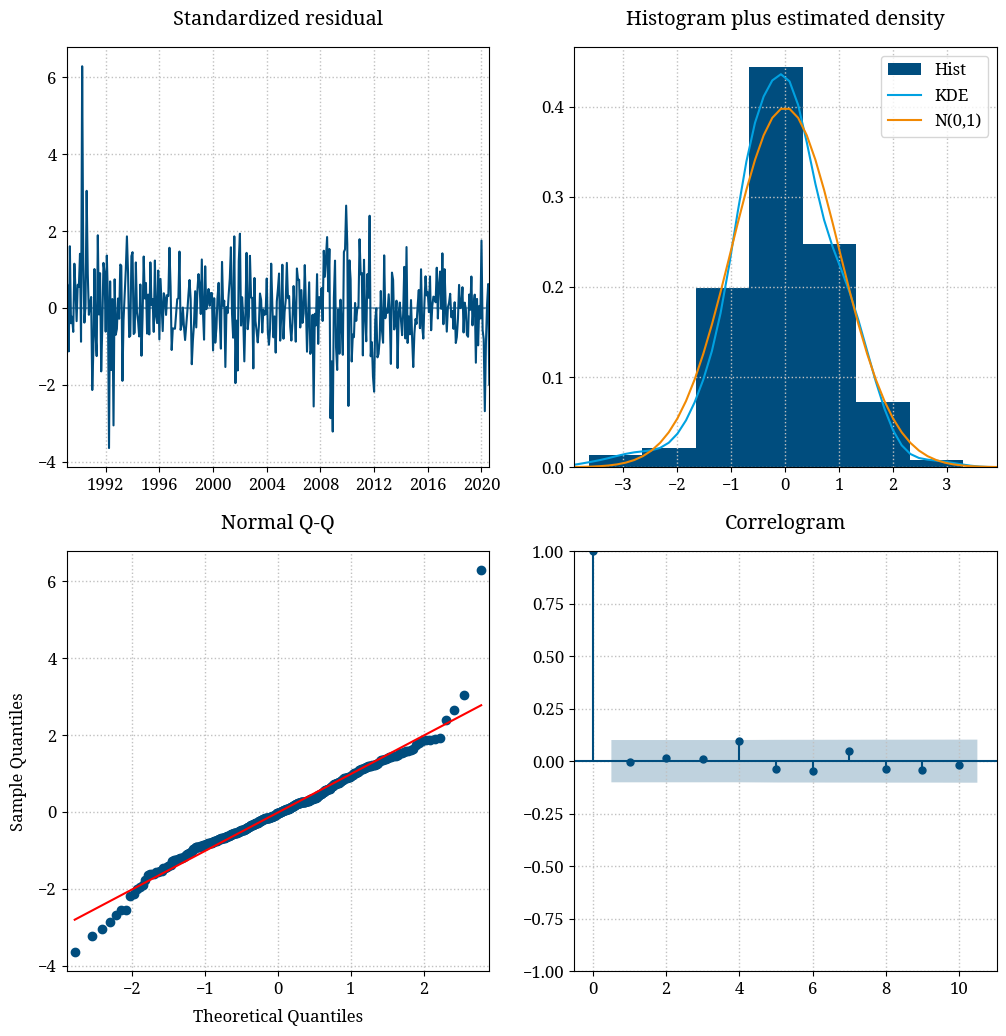

In [61]:
arimax_stepwise_model = auto_arima(y_train, X=x_train, trace=True, random_state=42)
print(arimax_stepwise_model.summary())

f_arimax_diog = plt.figure('arimax-diog', figsize=(12, 12))
arimax_stepwise_model.plot_diagnostics(fig=f_arimax_diog)
plt.savefig("figures/arimax-diog.pdf", bbox_inches="tight")
plt.show()

c:\Users\jonat\anaconda3\envs\nn\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE:  0.2434


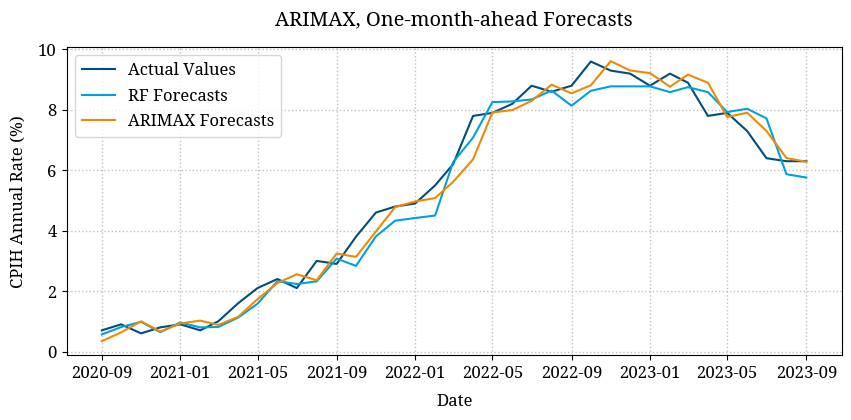

In [62]:
arimax_model = ARIMA(y_train,  order=(arimax_stepwise_model.order), exog=x_train)
arimax_model_fit = arimax_model.fit()

arimax_pred_test = arimax_model_fit.forecast(steps=len(y_test), exog=x_test)

arimax_mse = round(mean_squared_error(arimax_pred_test, y_test), 4)
arimax_mae = round(mean_absolute_error(arimax_pred_test, y_test), 4)
err_dict["ARIMAX"] = [arimax_mse, arimax_mae]

print(f"Test MSE: ", arimax_mse)

arimax_pred_test_series = pd.Series(arimax_pred_test, index=y_test.index)

f_arimax = plt.figure('arimax', figsize=(10, 4)) 
plt.title("ARIMAX, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(arimax_pred_test_series, label="ARIMAX Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/arimax-pred.pdf", bbox_inches="tight")
plt.show()

#### Seasonal Autoregressive Integrated Moving Average with Explanatory Variable (SARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-57.398, Time=1.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-9.703, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-41.733, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-64.080, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1860.729, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-13.558, Time=0.20 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-63.120, Time=1.00 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-71.666, Time=2.20 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-70.041, Time=2.61 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=-68.054, Time=1.74 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-70.230, Time=2.57 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=-69.628, Time=2.46 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=-71.660, Time=1.93 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=-67.744, Time=2.62 sec
 ARIMA(0,0,1)(0,0,2)[12]         

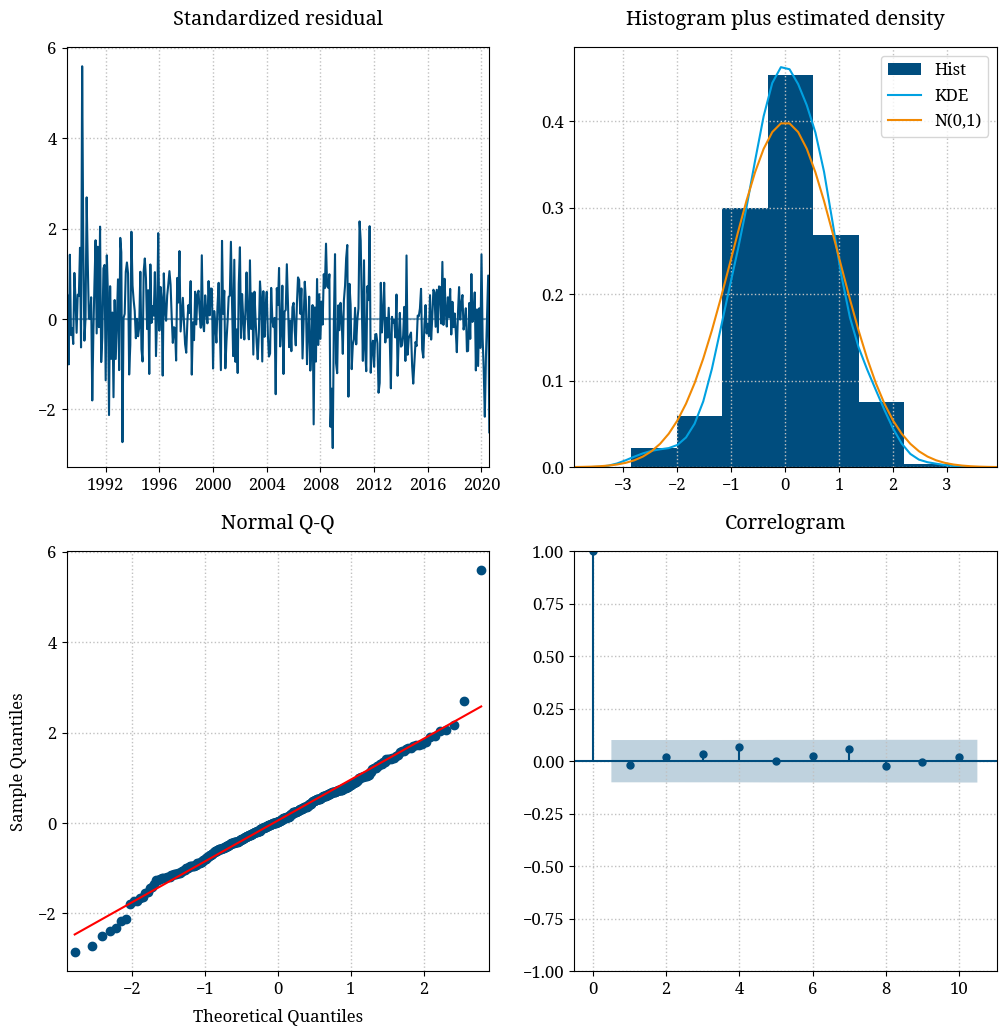

In [63]:
sarimax_stepwise_model = auto_arima(y_train, X=x_train, trace=True, random_state=42, m=12)
print(sarimax_stepwise_model.summary())

f_sarimax_diog = plt.figure('sarimax-diog', figsize=(12, 12))
sarimax_stepwise_model.plot_diagnostics(fig=f_sarimax_diog)
plt.savefig("figures/sarimax-diog.pdf", bbox_inches="tight")
plt.show()

c:\Users\jonat\anaconda3\envs\nn\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MSE:  0.2257


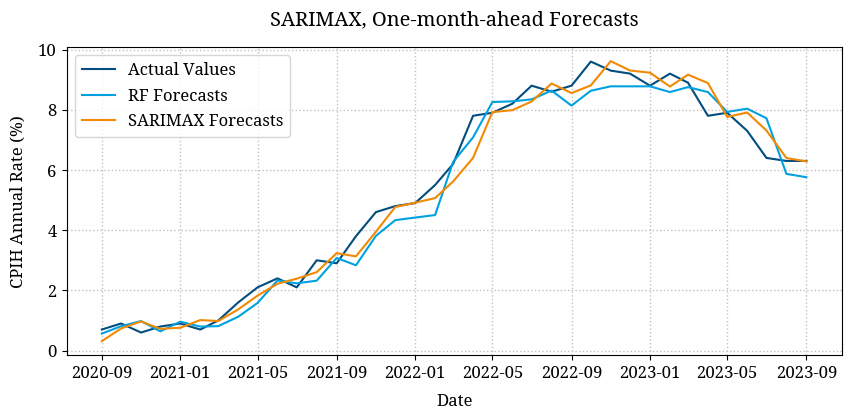

In [64]:
sarimax_model = ARIMA(y_train, order=(sarimax_stepwise_model.order), seasonal_order=(sarima_stepwise_model.seasonal_order), exog=x_train)
sarimax_model_fit = sarimax_model.fit()

sarimax_pred_test = sarimax_model_fit.forecast(steps=len(y_test), exog=x_test)

sarimax_mse = round(mean_squared_error(sarimax_pred_test, y_test), 4)
sarimax_mae = round(mean_absolute_error(sarimax_pred_test, y_test), 4)
err_dict["SARIMAX"] = [sarimax_mse, sarimax_mae]

print(f"Test MSE: ", sarimax_mse)

sarimax_pred_test_series = pd.Series(sarimax_pred_test, index=y_test.index)

f_sarimax = plt.figure('sarimax', figsize=(10, 4)) 
plt.title("SARIMAX, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(sarimax_pred_test_series, label="SARIMAX Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/sarimax-pred.pdf", bbox_inches="tight")
plt.show()

#### Long Short-Term Memory (LSTM)

Epoch 1/60
12/12 [==============================] - 1s 27ms/step - loss: 7.0738 - val_loss: 26.3055
Epoch 2/60
12/12 [==============================] - 0s 4ms/step - loss: 4.4353 - val_loss: 19.6567
Epoch 3/60
12/12 [==============================] - 0s 4ms/step - loss: 3.2112 - val_loss: 15.5162
Epoch 4/60
12/12 [==============================] - 0s 4ms/step - loss: 3.0049 - val_loss: 13.6225
Epoch 5/60
12/12 [==============================] - 0s 4ms/step - loss: 2.7735 - val_loss: 13.2837
Epoch 6/60
12/12 [==============================] - 0s 4ms/step - loss: 2.5706 - val_loss: 12.7689
Epoch 7/60
12/12 [==============================] - 0s 4ms/step - loss: 2.3858 - val_loss: 11.5225
Epoch 8/60
12/12 [==============================] - 0s 4ms/step - loss: 2.1696 - val_loss: 10.2904
Epoch 9/60
12/12 [==============================] - 0s 4ms/step - loss: 1.9474 - val_loss: 9.2102
Epoch 10/60
12/12 [==============================] - 0s 4ms/step - loss: 1.6848 - val_loss: 7.9625
Epoch 11/6

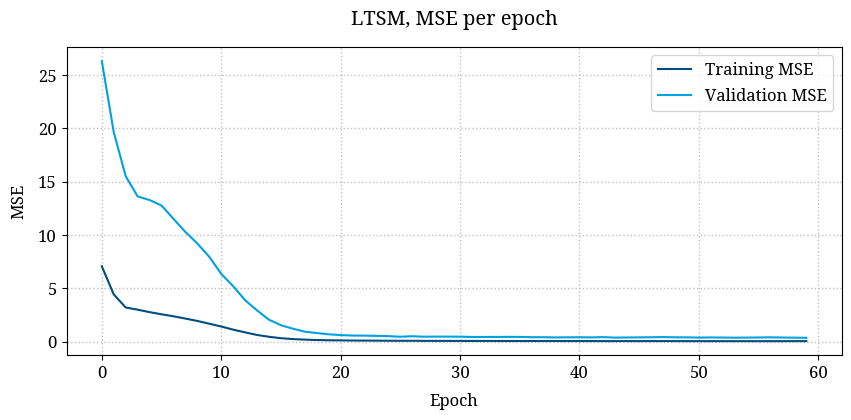

2/2 [==============================] - 0s 2ms/step
Test MSE:  0.3684


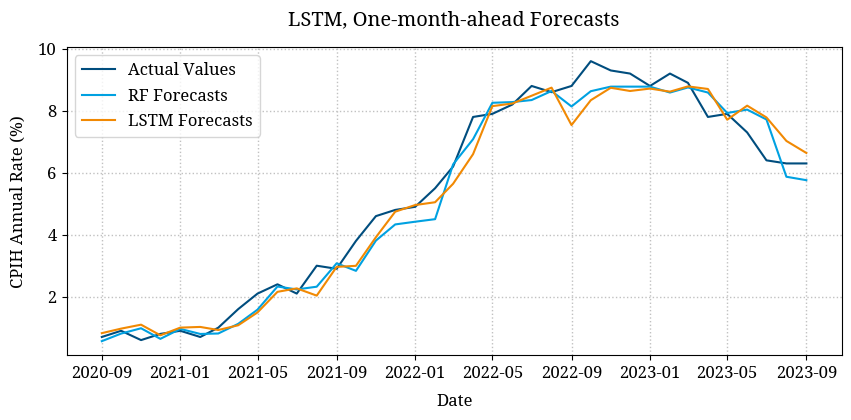

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import set_random_seed

set_random_seed(42)

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(None, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history = lstm_model.fit(x_train, y_train, epochs=60, batch_size=32, validation_data=(x_test, y_test))

# Get the MSE for each epoch
mse_per_epoch = history.history['loss']
val_mse_per_epoch = history.history['val_loss']

f_lstm_training = plt.figure('lstm-training', figsize=(10, 4)) 
plt.plot(mse_per_epoch, label='Training MSE')
plt.plot(val_mse_per_epoch, label='Validation MSE')
plt.title('LTSM, MSE per epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.savefig("figures/lstm-training.pdf", bbox_inches="tight")
plt.show()

lstm_pred_test = lstm_model.predict(x_test)

lstm_mse = round(mean_squared_error(lstm_pred_test, y_test), 4)
lstm_mae = round(mean_absolute_error(lstm_pred_test, y_test), 4)
err_dict["LSTM"] = [lstm_mse, lstm_mae]

print(f"Test MSE: ", lstm_mse)

lstm_pred_test_series = pd.Series(lstm_pred_test[:, 0], index=y_test.index)

f_lstm = plt.figure('lstm', figsize=(10, 4)) 
plt.title("LSTM, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(lstm_pred_test_series, label="LSTM Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/lstm-pred.pdf", bbox_inches="tight")
plt.show()

#### Least Absolute Shrinkage and Selection Operator (LASSO)

Best parameters:  {'alpha': 0.1, 'fit_intercept': False, 'random_state': 42}
Best score:  -0.1101
Test MSE:  0.268


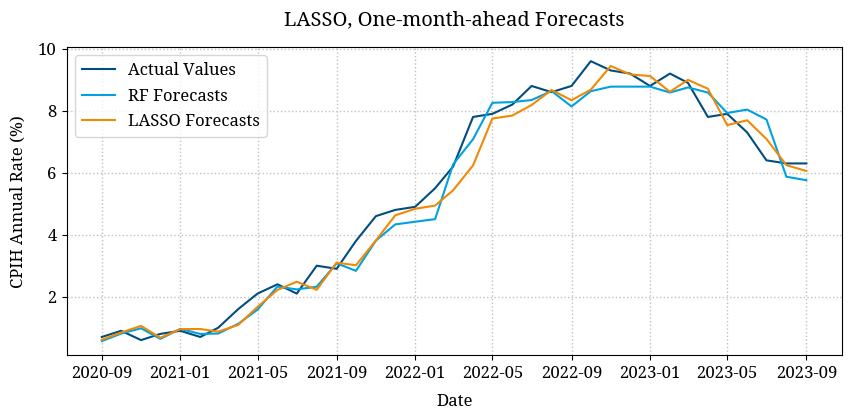

In [39]:
from sklearn.linear_model import Lasso

lasso_param_grid = {
    'fit_intercept': [True, False],
    'alpha': [0.1, 0.5, 1.0],
    'random_state': [42]
}

lasso = GridSearchCV(estimator=Lasso(), param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso.fit(x_train, y_train)
lasso_best_params = lasso.best_params_
lasso_pred_test = lasso.predict(x_test)

lasso_mse = round(mean_squared_error(lasso_pred_test, y_test), 4)
lasso_mae = round(mean_absolute_error(lasso_pred_test, y_test), 4)
err_dict["LASSO"] = [lasso_mse, lasso_mae]

print("Best parameters: ", lasso_best_params)
print("Best score: ", round(lasso.best_score_, 4))
print(f"Test MSE: ", lasso_mse)

lasso_pred_test_series = pd.Series(lasso_pred_test, index=y_test.index)

f_lasso = plt.figure('lasso', figsize=(10, 4)) 
plt.title("LASSO, One-month-ahead Forecasts")
plt.plot(y_test, label="Actual Values")
plt.plot(rf_pred_test_series, label="RF Forecasts")
plt.plot(lasso_pred_test_series, label="LASSO Forecasts")
plt.xlabel("Date")
plt.ylabel("CPIH Annual Rate (%)")
plt.legend()

plt.savefig("figures/lasso-pred.pdf", bbox_inches="tight")
plt.show()

#### Overall Comparison

In [66]:
err_df = pd.DataFrame.from_dict(err_dict, orient='index', columns=['MSE', 'MAE'])

err_df

,MSE,MAE
RF,0.2897,0.4265
1-MA,0.2962,0.4216
3-MA,0.6710,0.6550
RW-AO,1.4009,0.9156
LR,0.3038,0.4262
PC,17.1711,3.4755
ARIMA,36.4835,5.1278
SARIMA,30.9455,4.7136
KNN,0.3210,0.4441
MLR,0.2425,0.3834
